In [1]:
import pandas as pd

# Picking the dataset

The dataset used was: https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope

In [4]:
names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.csv", names=names)

## Loading the dataset

In [5]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


## Checking for missing data

In [6]:
def calc_missing_values(df):
  counts = (df
            .isnull()
            .sum())
  percentage = (counts
                .divide(df.shape[0]) # df.shape[1] is number of columns this is rows
                .multiply(100)
                )
  missing = pd.concat([counts, percentage], axis = 1)
  missing.columns = ["Num.", "% of missing"]
  return missing
calc_missing_values(df)

,Num.,% of missing
fLength,0,0.0
fWidth,0,0.0
fSize,0,0.0
fConc,0,0.0
fConc1,0,0.0
fAsym,0,0.0
fM3Long,0,0.0
fM3Trans,0,0.0
fAlpha,0,0.0
fDist,0,0.0


# Visualizations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

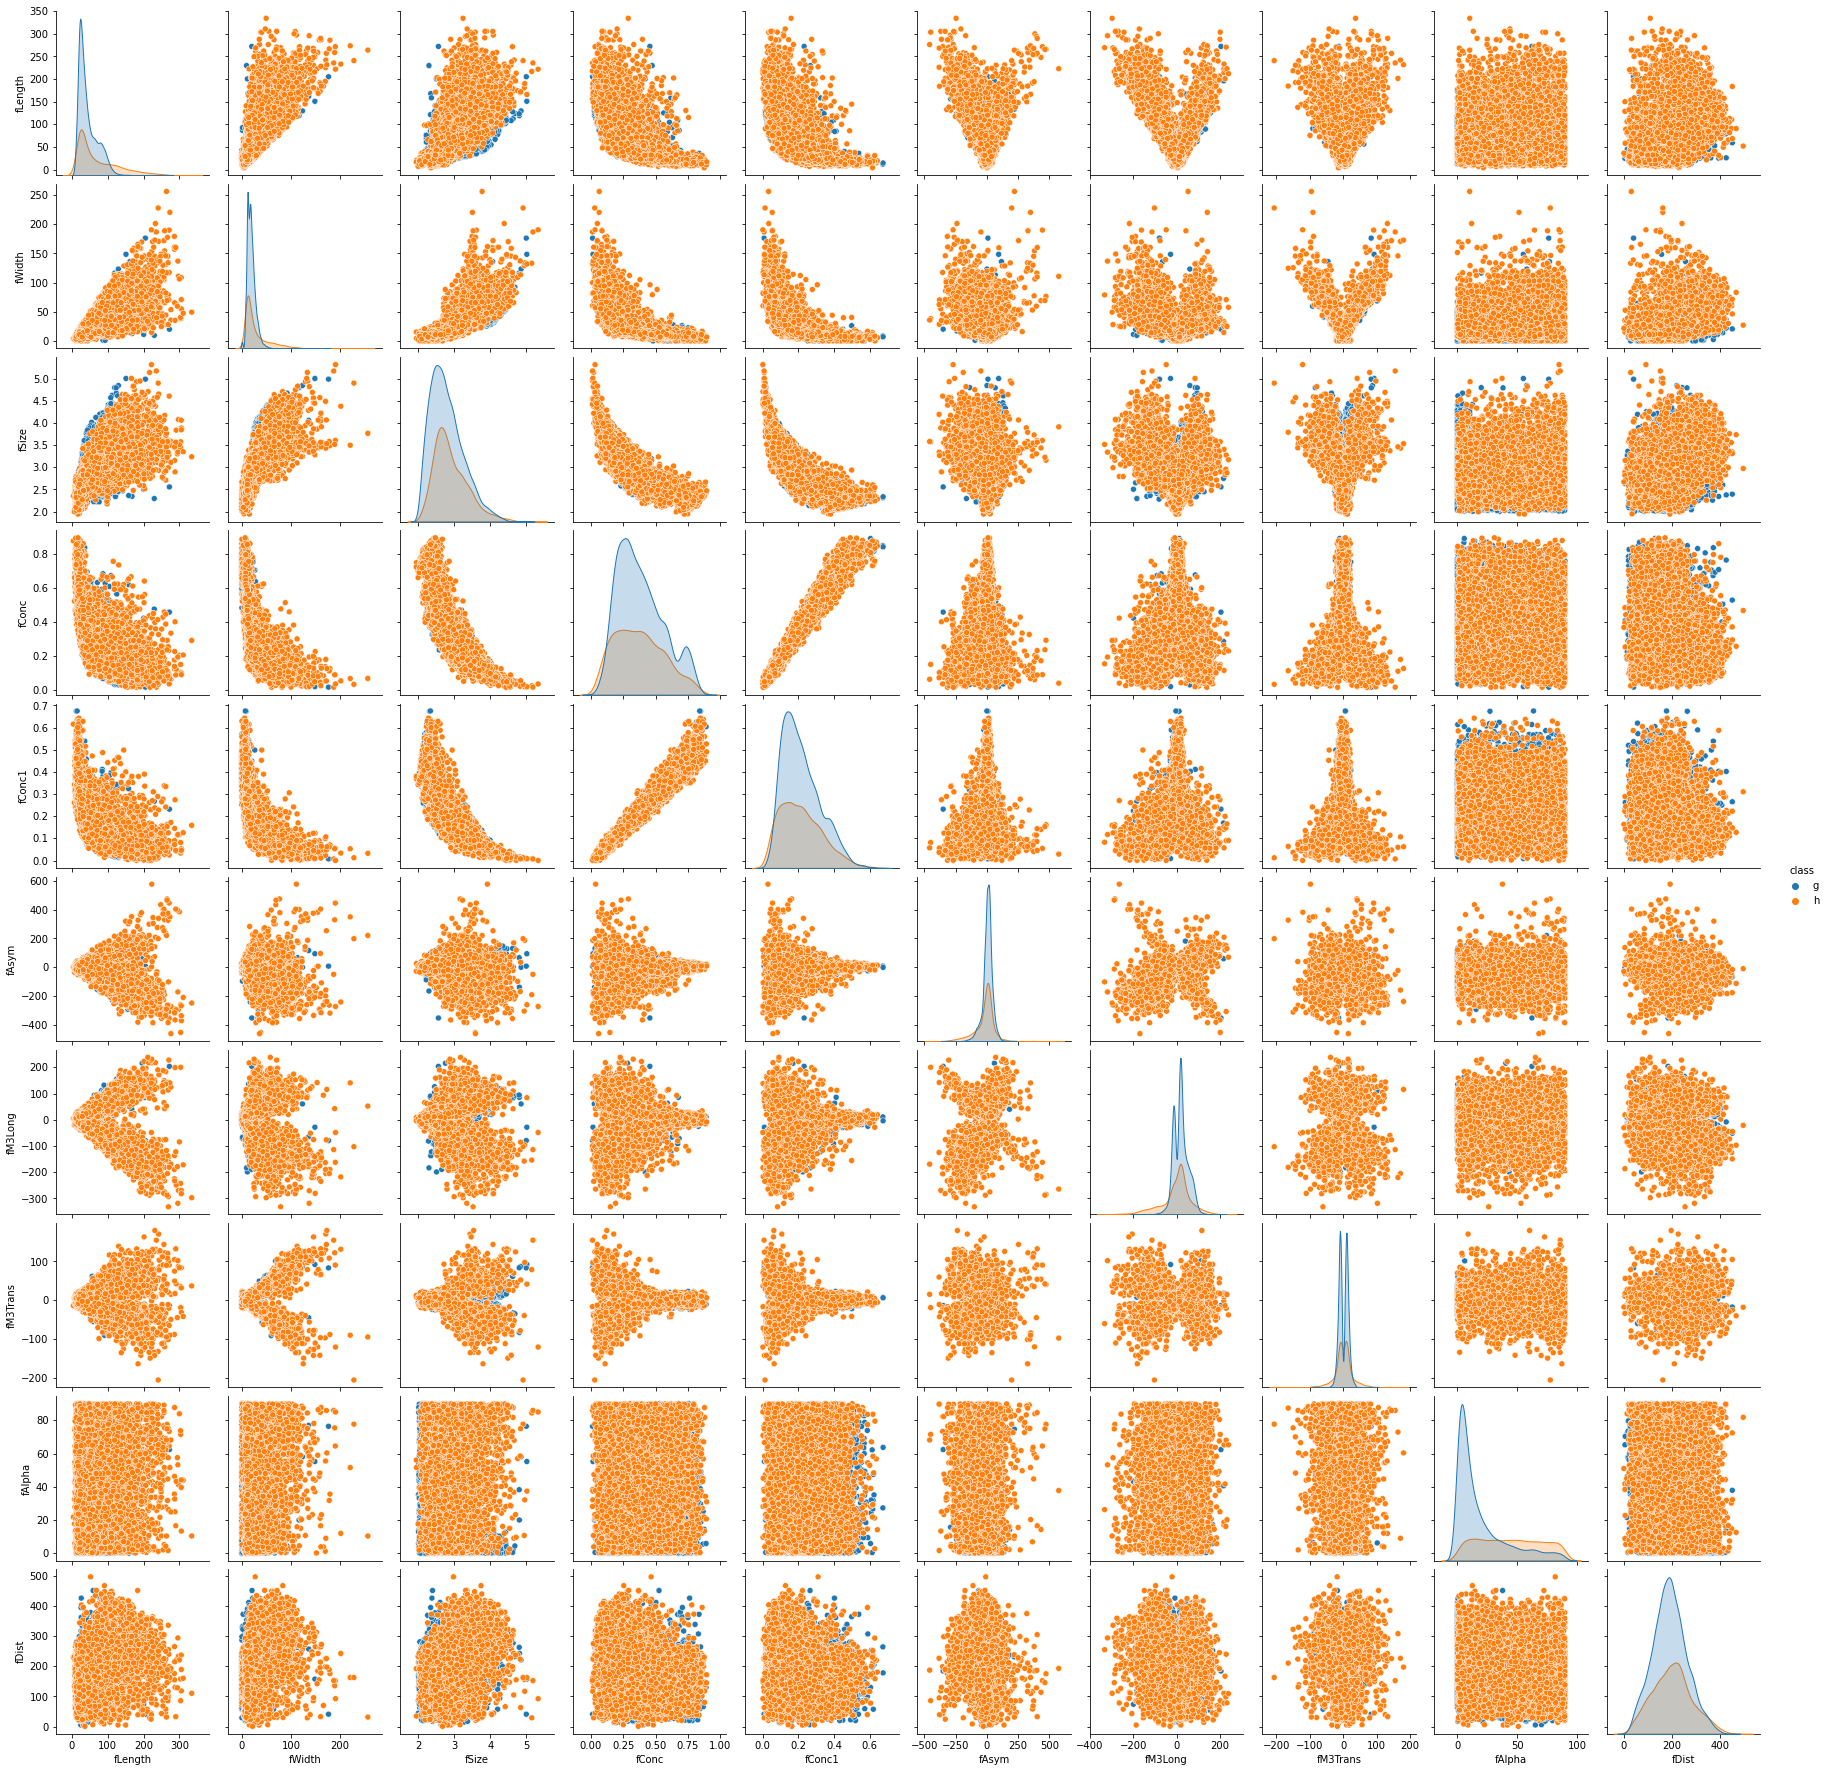

In [9]:
sns.pairplot(df, hue="class")

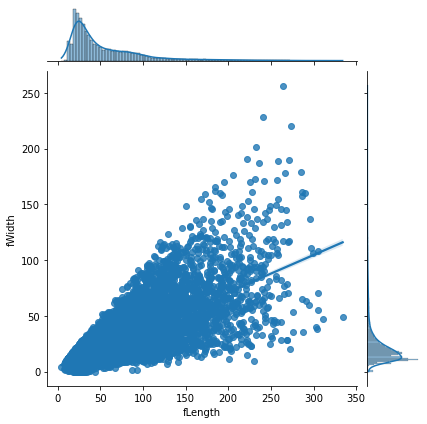

In [10]:
sns.jointplot(x="fLength", y="fWidth", data=df, kind="reg")

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


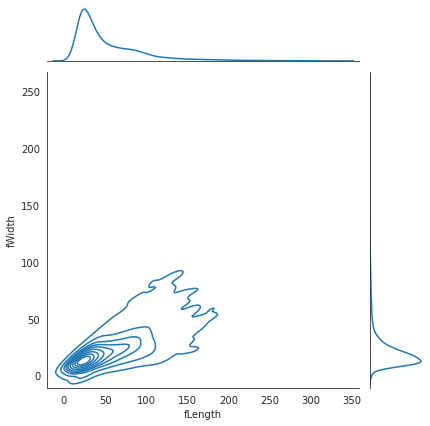

In [12]:
with sns.axes_style('white'):
    sns.jointplot("fLength", "fWidth", df, kind='kde');

c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Alek\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


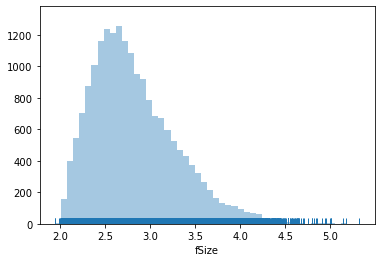

In [13]:

sns.distplot(df['fSize'], kde=False, rug=True);

In [15]:
from sklearn.preprocessing import StandardScaler
x = df.drop('class', axis = 1) # shoud be the y target here
y = df['class']
x = StandardScaler().fit_transform(x)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
final_df = pd.concat([principalDf, y], axis = 1)

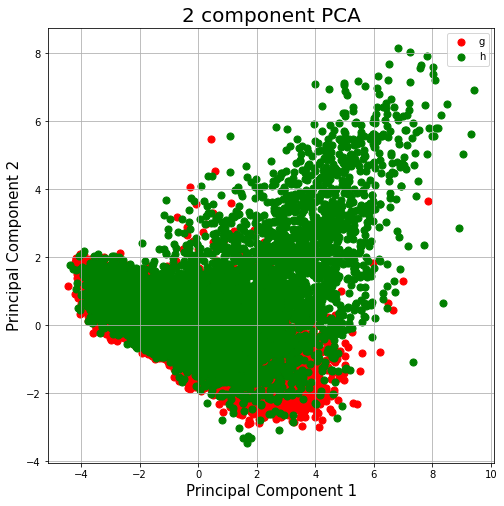

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['g', 'h']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['class'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Classification

In [25]:
from sklearn.model_selection import train_test_split
x = df.drop('class', axis = 1) # shoud be the y target here
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# we need 3 models from sklearn Naive bayes, LDA and QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
models = [GaussianNB(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
for model in models:
    model.fit(x_train, y_train)
    print(model.__class__.__name__, model.score(x_test, y_test))


GaussianNB 0.7268664563617245
LinearDiscriminantAnalysis 0.7875920084121977
QuadraticDiscriminantAnalysis 0.7891692954784437


Наивниот баесов класификатор прави претпоставка за независност на карактеристиките, додека пак QDA и LDA прават претпоставка за дистрибуцијата на податоците. Во ова податочно множество како што може да видиме од визуелзациите податоците следат одредени дистрибуции па затоа претпоставката за дистрибуцијата на податоците е подобра од претпоставка за независност на карактеристиките во овој случај.